In [312]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


Variables numéricas:

Una variable
        ○ Histograma
        ○ Boxplot

Dos variables
        ○ scatterplot

Variables categóricas:

Univariable
        ○ Countplot, pieplot

Bivariable
        ○ Barplot
Boxplot con hue

In [267]:
#Realizamos la carga del CSV que generamos en la transformación
df_merged = pd.read_csv("files/df_merged.csv")


In [313]:
def cambioaint(valor):
    """
    Intenta convertir el valor proporcionado a un número entero (int).
    
    Parámetros:
        valor: cualquier tipo de dato que se desea convertir a entero.

    Retorna:
        int(valor) si la conversión es exitosa,
        np.nan si ocurre un error (por ejemplo, si el valor no es convertible).
    """
    try:
        return int(valor)  
    except:
        return np.nan 



def cambioafloat(valor):
    """
    Intenta convertir el valor proporcionado a un número de punto flotante (float).
    
    Parámetros:
        valor: cualquier tipo de dato que se desea convertir a float.

    Retorna:
        float(valor) si la conversión es exitosa,
        np.nan si ocurre un error (por ejemplo, si el valor no es convertible).
    """
    try:
        return float(valor)
    except:
        return np.nan 

# Lista de códigos postales considerados inválidos
codigospochos = ['Y2K 6R0','U5I 4F1','K1F 2R2','H5Y 2S9','H2T 9K8','V09 2E9','V10 6T5']


def pocheznull(codigo):
    """
    Reemplaza un código postal si se encuentra en la lista de códigos inválidos.

    Parámetros:
        codigo: string que representa un código postal.

    Retorna:
        np.nan si el código está en la lista de códigos inválidos,
        el mismo código si no está en la lista.
    """
    if codigo in codigospochos:
        return np.nan
    return codigo


In [ ]:
#aplicamos las funciones ahora a nuestro nuevo csv, para una correcta visualización:
df_merged["Cancellation Month"] = df_merged["Cancellation Month"].apply(cambioaint).astype('Int64')

df_merged["Cancellation Year"] = df_merged["Cancellation Year"].apply(cambioaint).astype('Int64')

df_merged["Points Accumulated"] = df_merged["Points Accumulated"].apply(cambioaint).astype('Int64')

df_merged["Dollar Cost Points Redeemed"] = df_merged["Dollar Cost Points Redeemed"].apply(cambioafloat).astype('float64')

df_merged['Postal Code'] = df_merged['Postal Code'].apply(pocheznull)

In [ ]:
#sacamos una muestra para revisar que efectivamente todo se ha cargado con los cambios
df_merged.sample(8)

,Unnamed: 0,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
196028,196028,638237,2017,12,0,0,0,0,0,0,...,Bachelor,102379.0,Divorced,Aurora,7519.13,Standard,2017,6,<NA>,<NA>
66304,66304,930900,2017,4,0,0,0,0,0,0,...,Bachelor,71792.0,Married,Aurora,5470.06,Standard,2013,6,<NA>,<NA>
371142,371142,963541,2018,10,9,0,9,3654,365,0,...,College,NaN,Married,Nova,3756.64,Standard,2017,11,<NA>,<NA>
133843,133843,927202,2017,8,2,2,4,3748,374,0,...,Bachelor,78316.0,Married,Star,2637.94,Standard,2016,5,<NA>,<NA>
8287,8287,542085,2017,1,6,0,6,2124,212,0,...,Bachelor,57461.0,Single,Star,11264.36,Standard,2012,8,<NA>,<NA>
364348,364348,602694,2018,10,0,0,0,0,0,0,...,Master,79329.0,Divorced,Star,4904.89,Standard,2018,8,<NA>,<NA>
320697,320697,975949,2018,7,21,0,21,4704,470,0,...,Bachelor,53493.0,Divorced,Star,2573.72,Standard,2018,12,<NA>,<NA>
326061,326061,365413,2018,8,10,8,18,3672,367,0,...,Bachelor,50477.0,Married,Nova,7854.96,Standard,2017,9,<NA>,<NA>


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Me di cuenta de que en la columna de la izquierda los números eran ridículamente bajos, dado que cuando hacía un sample una única fila tenía muchos más vuelos reservados. Para intentar arreglarlo primero hice un group by de año y de mes. Después añadí flights booked que es la otra métrica que nos interesa, y de flightsbooked hice el sum para que haga un conteo de cuantos se reservaron: ej: el 8 de 2018 se reservaron 90512 vuelos, porque va sumando por cada fila que hay un match.

La conclusión de esta gráfica es que 2018 ha sido un año mucho mejor en cuanto a reservas. Se han incrementado las reservas en todos los meses. Hay meses en los que se realizan menos reservas, pero esto es esperable dado que los picos más bajos se corresponden con invierno o con periodos no-vacacionales, Diciembre nota un repunte dado que mucha gente vuela en fiestas de Navidad. Las temporadas más altas (Junio-Julio-Agosto) es en donde se puede ver un número mayor de reservas.

In [335]:
reservaagrupada = df_merged.groupby(['Month', 'Year'])['Flights Booked'].sum().reset_index()
reservaagrupada.sample(2)

,Month,Year,Flights Booked
15,8,2018,90512
21,11,2018,65345


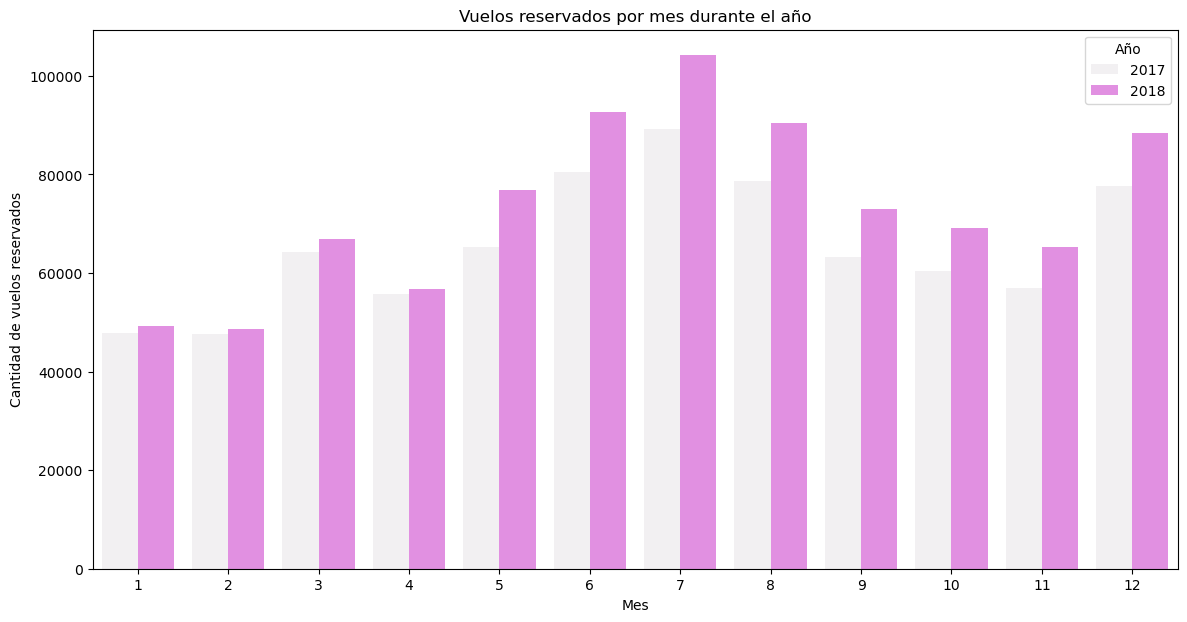

In [326]:
plt.figure(figsize=(14,7)) #queda más bonito si le metemos el size para que sea más grande. sino es más compacto
sns.barplot(data=reservaagrupada, x='Month', y='Flights Booked', hue='Year', palette= 'light:violet')
plt.title('Vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.legend(title='Año')
plt.show() # esto quita la leyenda, si no se le añade <matplotlib.legend.Legend at 0x2af11d6b9e0> al inicio

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

Elegí scatterplot porque me parece una buena gráfica para visualización de tendencias

Considero que existe una relación entre la distancia de los vuelos y los puntos acumulados.
Se ve una tendencia creciente, a cuanta más distancia más puntos se van acumulando.
Hay gente que con menos distancia lleva acumulados más puntos. Eso puede deberse a otros factores, por ejemplo si hay algún tipo de incremento de puntos por otras causas (se me ocurre que tal vez reservas en priority o compras en el propio vuelo puedan tener un añadido que esté afectando a esa variación). De todos modos sí que hay un claro incremento en los puntos acumulados en función de dicha distancia. 

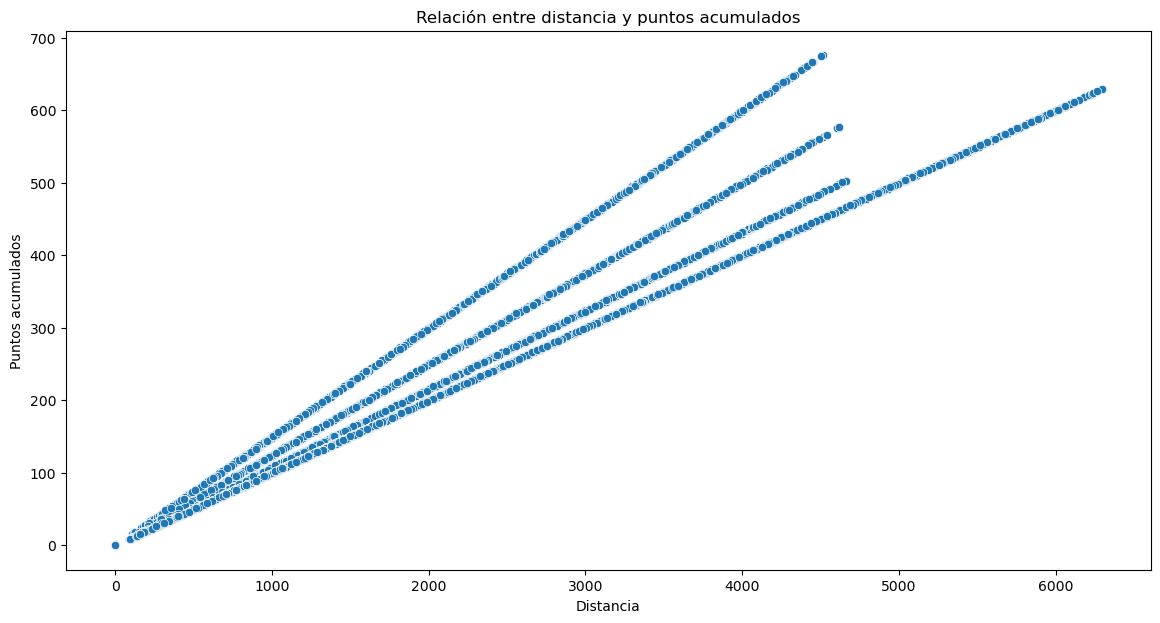

In [289]:

plt.figure(figsize=(14,7)) #queda más bonito si le metemos el size para que sea más grande. sino es más compacto
sns.scatterplot(data=df_merged, x='Distance', y='Points Accumulated')
plt.title('Relación entre distancia y puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')
plt.show()

3. ¿Cuál es la distribución de los clientes por provincia o estado?

En este caso se ha usado un barplot, pero han sido necesarias ciertas consideraciones para poder pintar la gráfica correctamente. En Loyalty Number habia duplicados. No se han tenido en cuenta para el análisis dado que únicamente trabajaremos con una entrada por cliente. Además de eso se hecho un sort por Provincia. Esto está para poder añadir Province. Después se hace un conteo por la susodicha provincia y se resetea el index para que tenga formato de dataframe. Se genera la gráfica con esta información, usando este contexto como data y marcando en los ejes x e y las provincias y el conteo.

Ontario sería la provincia con más clientes, y Prince Edward Island sería el lugar con menos clientes. 
Más abajo añado insights más detallados sobre esto en la parte de conclusiones.

In [ ]:
Clientesnodupe = df_merged.drop_duplicates(subset=['Loyalty Number'], keep='last')

In [290]:
#se droppean duplicados porque en Loyalty Number puede haber duplicados

Clientesnodupe = df_merged.drop_duplicates(subset=['Loyalty Number'], keep='last')

In [ ]:
#sobre los no duplicados se hace un sort por provincia

Provincianos = Clientesnodupe.sort_values(by='Province')

In [292]:
#conteo por provincia. Reset index para que quede como df

provinporclient = Provincianos['Province'].value_counts().reset_index()
provinporclient

,Province,count
0,Ontario,5404
1,British Columbia,4409
2,Quebec,3300
3,Alberta,969
4,Manitoba,658
5,New Brunswick,636
6,Nova Scotia,518
7,Saskatchewan,409
8,Newfoundland,258
9,Yukon,110


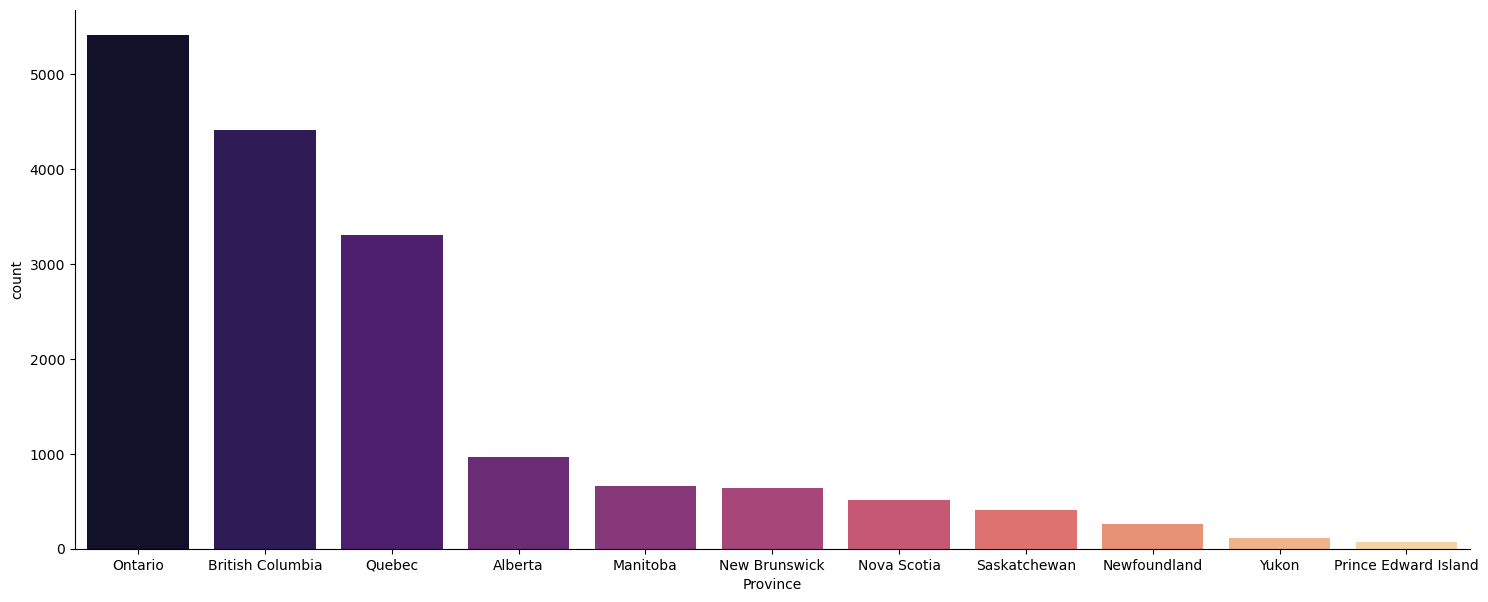

In [293]:
plt.figure(figsize=(18,7))
sns.barplot(data=provinporclient, x='Province', y='count', hue='Province', palette= 'magma')
sns.despine(top=True, right=True)

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Utilizo de nuevo un barplot.
Droppeo duplicados de Loyalty, quedándome con el último (esto es intencional porque creo que es mejor quedarse con el último registro de clientes en lugar del primero por si hubiese algún tipo de actualización sobre el mismo). 
Elimino también los valores nulos de salario.
Combino ambas cosas y lo uso como data para poder filtrar después por Educación y Salario.
Vemos que el salario mejora en base a la educación, siendo high school el grupo con salarios más bajos, seguido por bachelor (que serían grados universitario que se realizan después de high school). A mayor especializacion mejor salario.
Nadie de college tenía salario, siempre eran nulos, ese es el motivo por el cual college no aparece reflejado en la gráfica.

In [ ]:
#compruebo que todo esté bien por si acaso dado que una columna no aparece. 
# Efectivamente no hay nadie con educación college que haya querido facilitar su salario:
df_merged[df_merged['Education'] == 'College'].dropna(subset=['Salary'])

,Unnamed: 0,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [294]:
Clientesnodupe2 = df_merged.drop_duplicates(subset=['Loyalty Number'], keep='last').reset_index()

In [295]:
Salariosnotnull = df_merged.dropna(subset=['Salary']).reset_index()


In [296]:
totaldesalarioycli = df_merged.drop_duplicates(subset=['Loyalty Number'], keep='last').dropna(subset=['Salary']).reset_index() 

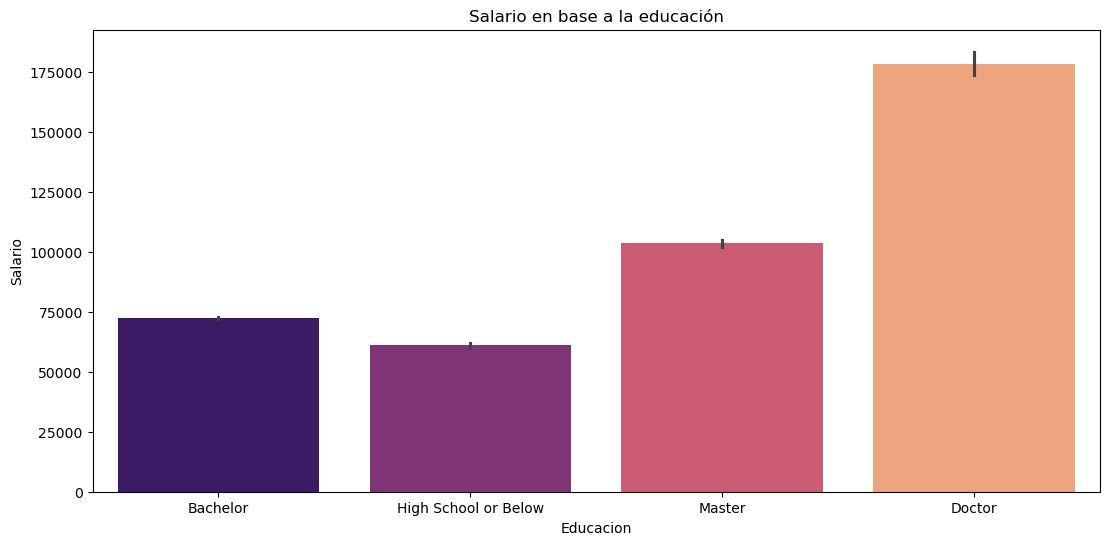

In [297]:
#nadie en colleage, así que no aparece porque estos datos ya han sido filtrados para no tener en cuenta ni duplicados en clientes ni el 25% de nulos de salario.

plt.figure(figsize=(13,6))
sns.barplot(data=totaldesalarioycli, x='Education', y='Salary',hue='Education', palette='magma')
plt.title('Salario en base a la educación')
plt.xlabel('Educacion')
plt.ylabel('Salario')
plt.show()

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


He realizado dos pruebas de gráficas. He decidido que lo mejor es un pie chart porque es mucho más sencillo de ver todo. 
La palabra proporción me ha llevado a pensar que se deseaba que el resultado estuviese en porcentaje y es por ello por lo que
hay un normalize=True*100 en el value counts de la primera gráfica.
Esto mismo se ve reflejado en la segunda gráfica con el siguiente parámetro: autopct='%1.1f%%', Esto indicaría que es un float y redondearía a un decimal.
Hemos quitado los duplicados de los clientes para que no afectase al resultado. Hemos hecho un sort por loyalty card para que quedase incluído y luego hemos usado esa información para contar loyalty card y proportion.
Pensaba que tal vez añadir el autopct='%1.1f%%' podría ser reiterar en el porcentaje dado que ya lo hemos pasado a porcentaje en totalcliedu, pero sin eso no muestra resultado así que afecta a la visualización.

Viendo la gráfica llegamos a la conclusión de que un 45.6% del total de clientes usan la tarjeta Star. Un 33.9 la Nova, y el restante 20.5 la Aurora
Nótese que hay un ligero redondeo de proporción para el primer decimal.

In [298]:
Clientesnodupe2 = df_merged.drop_duplicates(subset=['Loyalty Number'], keep='last').reset_index()

In [299]:
educlinodupe = Clientesnodupe2.sort_values(by='Loyalty Card')

In [300]:
totalcliedu = educlinodupe['Loyalty Card'].value_counts(normalize=True)*100
totalcliedu = pd.DataFrame(totalcliedu).reset_index()

In [301]:
totalcliedu

,Loyalty Card,proportion
0,Star,45.629444
1,Nova,33.883014
2,Aurora,20.487543


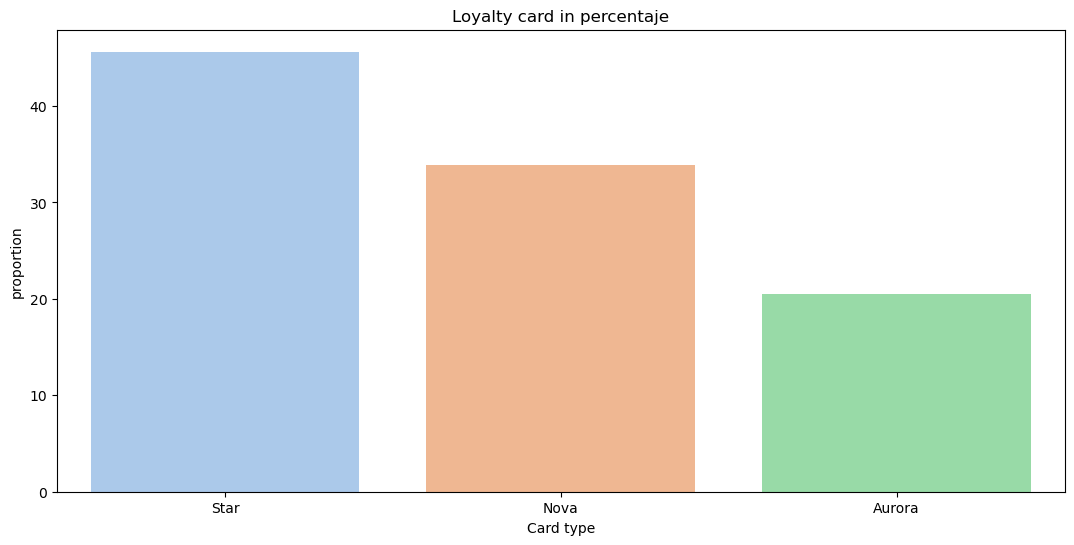

In [302]:
#este gráfico está bien, pero es mejor el pieplot, así que lo hago a continuación. 
#dejo este como forma alternativa de hacerlo.

plt.figure(figsize=(13,6))
sns.barplot(data=totalcliedu, x='Loyalty Card', y='proportion', hue='Loyalty Card', palette='pastel')
plt.title('Loyalty card in percentaje')
plt.xlabel('Card type')
plt.show()

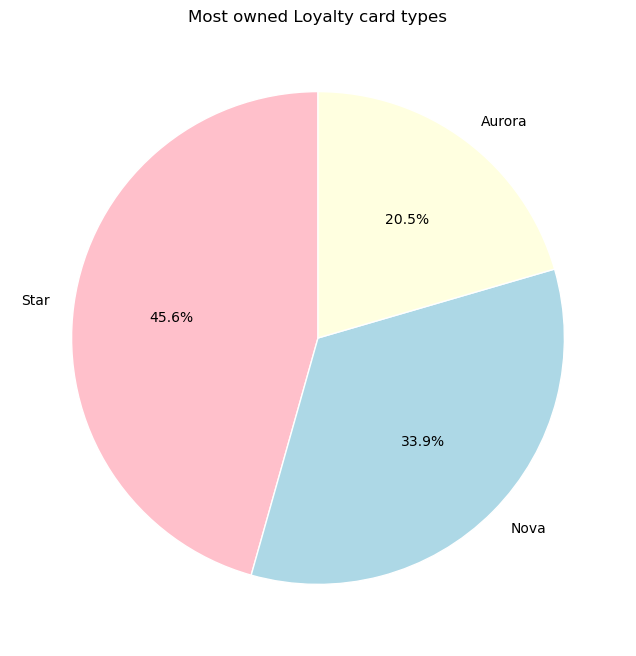

In [339]:
#pie 
#plt.pie(valores, labels, autopct, startangle, data, colors)
plt.figure(figsize=(8,8))
plt.pie(
        x=totalcliedu['proportion'], #meto x porque sino da error de que falta X si solo popngo labelsne necesito añadir la proportion
        labels=totalcliedu['Loyalty Card'], 
        autopct='%1.1f%%', 
        colors=['pink', 'lightblue','lightyellow'], 
        startangle=90,
        wedgeprops={'edgecolor': 'white'})
plt.title('Most owned Loyalty card types')
plt.show()

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

Aquí quitamos los clientes duplicados.Después le hacemos un sort para añadir el gender, y después agrupamos metiendo también el marital status. El gender tiene que ir en el group by, es importante porque sino no nos lo permite utilizar luego. Ha generado el conteo con una columna de nombre 0. inicialmente pensé que era string pero era int. renombré la columna a count usando ese 0 como int porque si lo hacía como diccionario "0" fallaba. Después procedí a pintar la gráfica.

Creo que no hay mucha diferencia entre géneros en relación al estado civil. Me extraña que no haya una variación más grande entre ambos pero el conteo parece correcto.

In [348]:
Clientesnodupe3 = df_merged.drop_duplicates(subset=['Loyalty Number'], keep='last').reset_index()

In [349]:
clinodupegend = Clientesnodupe3.sort_values(by='Gender')


In [350]:
genclicounts = clinodupegend.groupby(['Gender', 'Marital Status']).size().reset_index() #gender no se puede sacar
genclicounts

,Gender,Marital Status,0
0,Female,Divorced,1269
1,Female,Married,4869
2,Female,Single,2272
3,Male,Divorced,1249
4,Male,Married,4866
5,Male,Single,2212


In [351]:
print(genclicounts.columns)

Index(['Gender', 'Marital Status', 0], dtype='object')


In [352]:
genclicounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          6 non-null      object
 1   Marital Status  6 non-null      object
 2   0               6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


In [353]:
#intentamos renombrar la columna del conteo
genclicounts = genclicounts.rename(columns={0: 'Count'})  #ES INT. SI SE INTENTAN CON CORCHETES FALLA PORQUE INTENTA CAMBIAR DESDE STRING

In [354]:
genclicounts

,Gender,Marital Status,Count
0,Female,Divorced,1269
1,Female,Married,4869
2,Female,Single,2272
3,Male,Divorced,1249
4,Male,Married,4866
5,Male,Single,2212


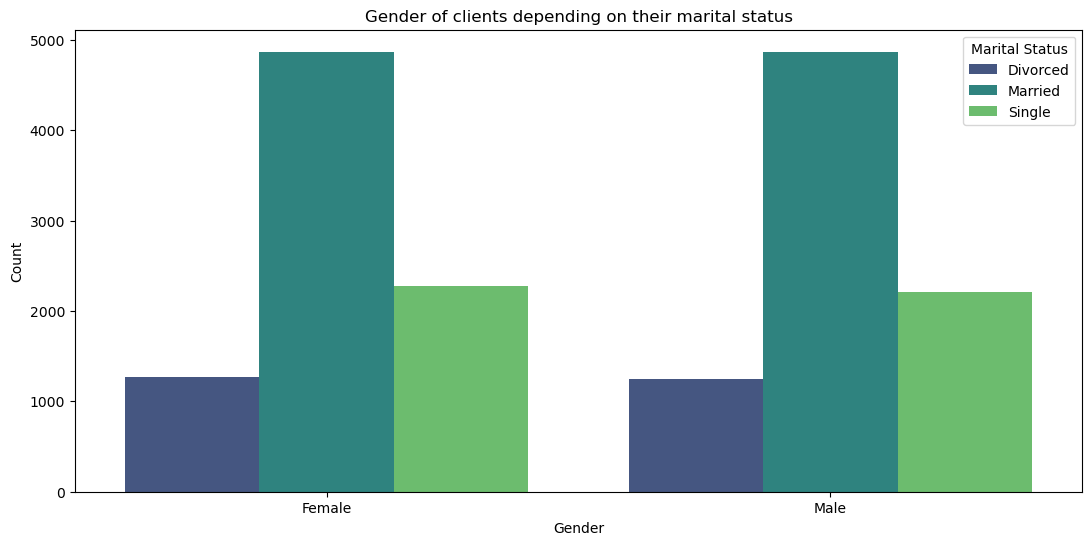

In [360]:
plt.figure(figsize=(13,6))
sns.barplot(data=genclicounts, x='Gender', y='Count', hue='Marital Status', palette='viridis')
plt.title('Gender of clients depending on their marital status')
plt.xlabel('Gender')
plt.show()

Conclusiones personales y/o recomendaciones basadas en los datos analizados tal y como se han revisado:

A nivel campaña:

-Hay gente que ha cancelado la membresía y que todavía le quedan puntos acumulados. Se les podría enviar un email de campaña para intentar recuperar a esos clientes indicándoles que todavía conservan sus puntos.

-En relacción a los Points Accumulated, se han transformado a INT y habrá ligeras diferencias en redondeo por este motivo dado que la conversión redondea hacia abajo. Se recomienda realizar un aviso a los clientes (o utilizar diferentes métodos para la conversión)

-Hay mucha menos gente de estos dos lugares que tengan membresía. Es de esperar ya que la población es mucho menor y no necesariamente tiene que representar un problema, sino una realidad poblacional:
Prince Edward Island y Yukon

Yukon tiene muy poca población, sin embargo tiene uno de los rates más altos de crecimiento poblacional. 
No centraría la atención ahí por lo de ahora, porque siento que sería malgastar recursos que pueden ir destinados a otras zonas como British Columbia, en donde la población es mucho mayor y también tiene un ratio de crecimiento elevado.

-No hay ningún miembro de Nunavut, sin embargo es uno de los territorios con más land area y tienen aeropuerto. Se podría intentar realizar un estudio de mercado para ver si saldrái rentable expandir el negocio a esa zona. 

Densidad de población de Canadá:
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=9810000101

Otra información que se ha visto:

-La actividad de vuelo comprende el rango de 2017 y 2018.

-Revisando los nulos llegamos a la conclusión de que solamente un 12.35% de los clientes canceló la membresía, dado que entendemos los no-nulos como gente que ha cancelado membresía.
       No quitaría los clientes que hayan cancelado porque podrían regresar en cualquier momento, y además es información que tal vez nos interese tener para un análisis sobre retención de clientes (ej: en qué ciudad se han dado más de baja? Tal vez haya algo mal en una sede en específico que se tenga que revisar) 

-Un 25.32% de los clientes no tienen un salario añadido. Esto puede ser esperable dado que la gente podría ser reticente a compartir cierta información como en este caso el salario. Para las visualizaciones que incluyen salario (ej: 4) hemos quitado los nulos y hemos trabajado solo con los datos de clientes que sí han facilitado su salario. Es importante tener esto en cuenta ya que trabajamos con una muestra que incluiría el 74.68% de aquellos clientes que sí han facilitado el salario.

-El género femenino es el que tiene más presencia en el programa de lealtad.
-Hay más gente casada con membresía en el programa. La diferencia con el resto de estados maritales es considerable.
-Star es la loyalty card que más se ve (45.6%)
-Ontario(Toronto) destaca como lugar en el que hay más membresías.

-Hay gente que metió introdujo un código postal incorrecto. Se ha dejado la columna pero se han sustituído los valores incorrectos por nulos para que no den pie a confusiones y se puedan obviar en posibles visualizaciones futuras en las que el código postal sea relevante.

-Como curiosidad, hay gente que nunca ha volado si nos fijamos en total flights ya que hay gente con 0 en total.

-En enrollment type solo hay standard y una promo de 2018. no eliminamos la columna por tenerla para posibles comparativas de campaña en futuro, o por si se decide hacer algo con esa gente de 2018 de esa campaña.

-Todos los negativos en salario entraron en la promo de 2018, pero no todos los de esa promo tienen mal el salario. 
Cambiamos negativos a positivos ya que parece que son unas cifras que podrían haberse metido en negativo sin querer y solo hay 20 personas sobre el total que lo hayan introducido de esta manera. Hay bastante diferencia en los salarios para el mismo nivel de educación pero eso puede depender de muchos factores.

-Es normal que haya diferencia duplicados en loyalty, en loyalty es como base de datos de clientes así que no puede haber duplicados. Y en activity puede aparecer un cliente 27 veces si voló mucho.
No se borran duplicados por esta razón. Se entiende que está correcta.